<a href="https://colab.research.google.com/github/troders34/Machine-Learning/blob/main/Training%20SKLearn%20with%20Grid%20Search%20Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# read the dataset dan change it into dataframe
data = pd.read_csv('Salary_Data.csv')

In [3]:
import numpy as np

# divide the attribute and label
X = data['YearsExperience']
y = data['Salary']

# change the form of attribute
X = np.array(X)
X = X.reshape(-1, 1)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# develop model with parameter C, gamma, and kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)

# train the model with 'fit' function
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [5]:
# show the best parameter from object grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [7]:
# create new SVM model with the best parameter of grid_search
model_new = SVR(C=100000, gamma=0.05, kernel='rbf')
model_new.fit(X, y)

SVR(C=100000, gamma=0.05)

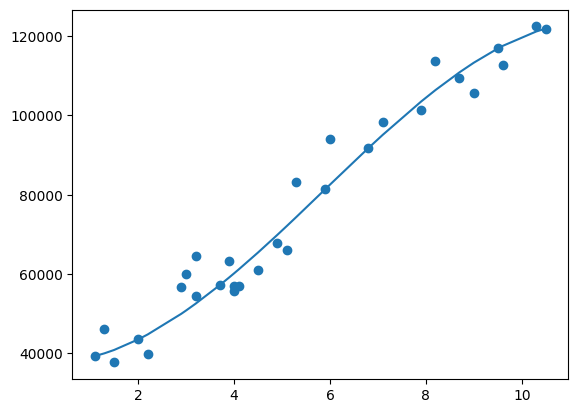

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_new.predict(X))